# Level - 3

## Task - 2 :  Customer Preference Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Dataset.csv")
df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Is delivering now     9551 non-null   object 
 15  Switch to order menu 

###  Analyze the relationship between the type of cuisine and the restaurant's rating.

In [5]:
cuisines = df["Cuisines"]

In [6]:
cuisines.value_counts().head(10)

Cuisines
North Indian                      936
North Indian, Chinese             511
Chinese                           354
Fast Food                         354
North Indian, Mughlai             334
Cafe                              299
Bakery                            218
North Indian, Mughlai, Chinese    197
Bakery, Desserts                  170
Street Food                       149
Name: count, dtype: int64

In [7]:
top_10_cuisines = cuisines.value_counts().head(10).index

In [8]:
cuisines_ratings = pd.DataFrame({"cuisine" : cuisines, "Rating" : df["Aggregate rating"]})

In [9]:
cuisines_ratings_top_10 = cuisines_ratings[cuisines_ratings["cuisine"].isin(top_10_cuisines)]

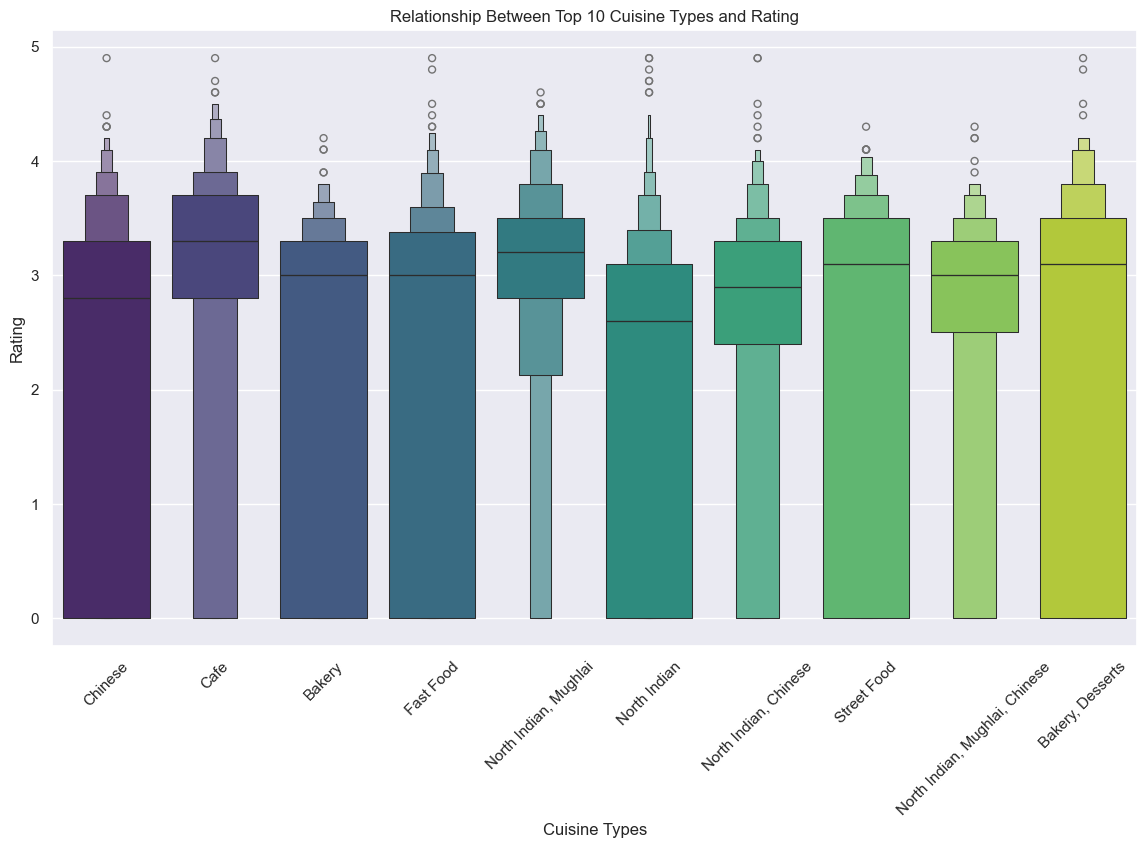

In [10]:
plt.figure(figsize=(14,8))
sns.boxenplot(x="cuisine", y="Rating", data = cuisines_ratings_top_10, palette="viridis")
plt.title("Relationship Between Top 10 Cuisine Types and Rating")
plt.xlabel("Cuisine Types")
plt.xticks(rotation=45)
plt.show()

### Identify the most popular cuisines among customers based on the number of votes.

In [11]:
cuisines_votes = pd.DataFrame({"cuisine" : cuisines, "Votes" : df["Votes"]})

In [12]:
cuisines_votes_sum = cuisines_votes.groupby("cuisine")["Votes"].sum()


In [13]:
popular_cuisines = cuisines_votes_sum.sort_values(ascending=False)

In [14]:
print("Top 10 most popular cuisines based on number of votes : ")
print(popular_cuisines.head(10))

Top 10 most popular cuisines based on number of votes : 
cuisine
North Indian, Mughlai             53747
North Indian                      46241
North Indian, Chinese             42012
Cafe                              30657
Chinese                           21925
North Indian, Mughlai, Chinese    20115
Fast Food                         17852
South Indian                      16433
Mughlai, North Indian             15275
Italian                           14799
Name: Votes, dtype: int64


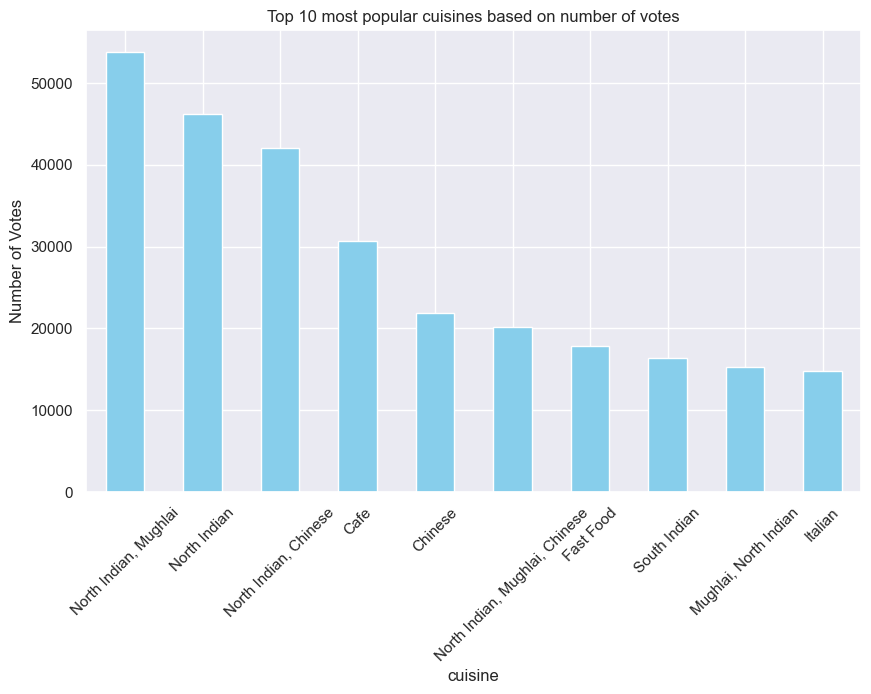

In [15]:
plt.figure(figsize=(10,6))
popular_cuisines.head(10).plot(kind="bar", color="skyblue")
plt.title("Top 10 most popular cuisines based on number of votes")
plt.xlabel("cuisine")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45)
plt.show()

###  Determine if there are any specific cuisines that tend to receive higher ratings.

In [21]:
# Create a DataFrame with cuisine and rating columns
cuisines_ratings = pd.DataFrame({"cuisine": cuisines, "Rating": df["Aggregate rating"]})

# Group by cuisine and calculate the average rating
average_rating_by_cuisine = cuisines_ratings.groupby("cuisine")["Rating"].mean()

In [22]:
sorted_cuisines_by_rating = average_rating_by_cuisine.sort_values(ascending=False)

In [23]:
print("Top 10 Cuisines with the highest average Ratings : ")
print(sorted_cuisines_by_rating.head(10))

Top 10 Cuisines with the highest average Ratings : 
cuisine
Italian, Deli               4.9
Hawaiian, Seafood           4.9
American, Sandwich, Tea     4.9
Continental, Indian         4.9
European, Asian, Indian     4.9
European, Contemporary      4.9
European, German            4.9
BBQ, Breakfast, Southern    4.9
American, Coffee and Tea    4.9
Sunda, Indonesian           4.9
Name: Rating, dtype: float64


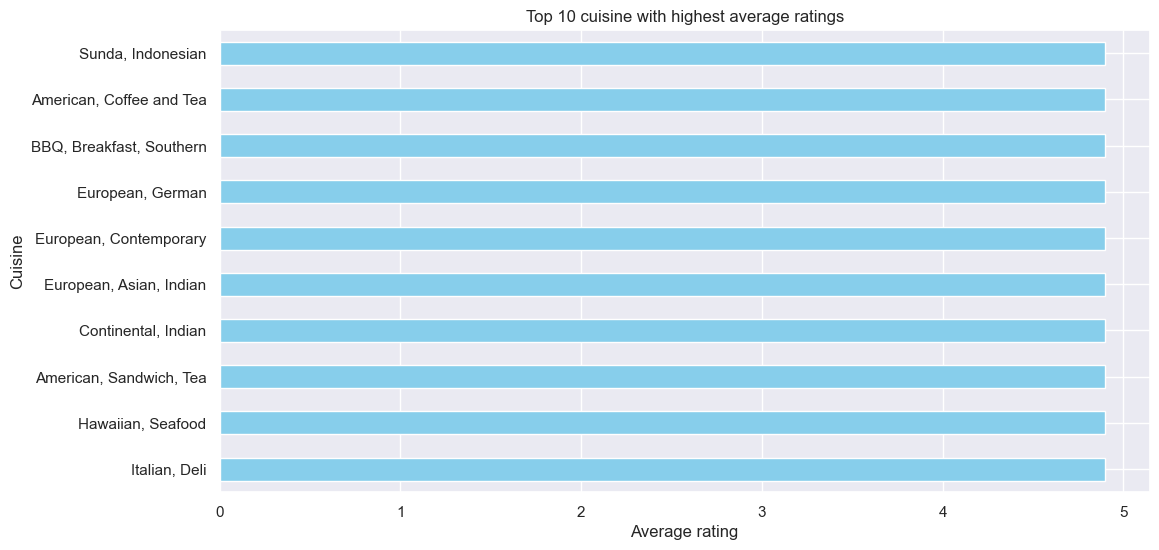

In [24]:
plt.figure(figsize=(12,6))
sorted_cuisines_by_rating.head(10).plot(kind = "barh", color = "skyblue")
plt.title("Top 10 cuisine with highest average ratings")
plt.xlabel("Average rating")
plt.ylabel("Cuisine")
plt.show()